In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib



In [10]:
# 1. Load Dataset
df = pd.read_csv('/content/sample_data/Titanic_Dataset.csv')

In [11]:
# 2. Preprocessing (Tailored to your columns)
# Drop PassengerId as it's just an index and won't help the model
df = df.drop(columns=['PassengerId'], errors='ignore')

# Fill missing values for Age
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

# Convert Sex (Categorical) to Numbers
le = LabelEncoder()
if 'Sex' in df.columns:
    df['Sex'] = le.fit_transform(df['Sex'])

# Define Features (X) and Target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [12]:
# 3. Scaling & Split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
# 4. Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

In [15]:
# 5. Train and Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "Train_Acc": accuracy_score(y_train, y_train_pred),
        "Test_Acc": accuracy_score(y_test, y_pred)
    }
    # Calculate Generalization Gap (Higher gap = More Overfitting)
    metrics["Gen_Gap"] = abs(metrics["Train_Acc"] - metrics["Test_Acc"])
    results.append(metrics)

In [16]:
# 6. Comparison Table
comparison_df = pd.DataFrame(results)
print("\n--- Model Comparison Table ---")
print(comparison_df[['Model', 'Accuracy', 'F1-Score', 'Gen_Gap']])


--- Model Comparison Table ---
                 Model  Accuracy  F1-Score  Gen_Gap
0  Logistic Regression       1.0       1.0      0.0
1        Decision Tree       1.0       1.0      0.0
2        Random Forest       1.0       1.0      0.0
3                  SVM       1.0       1.0      0.0


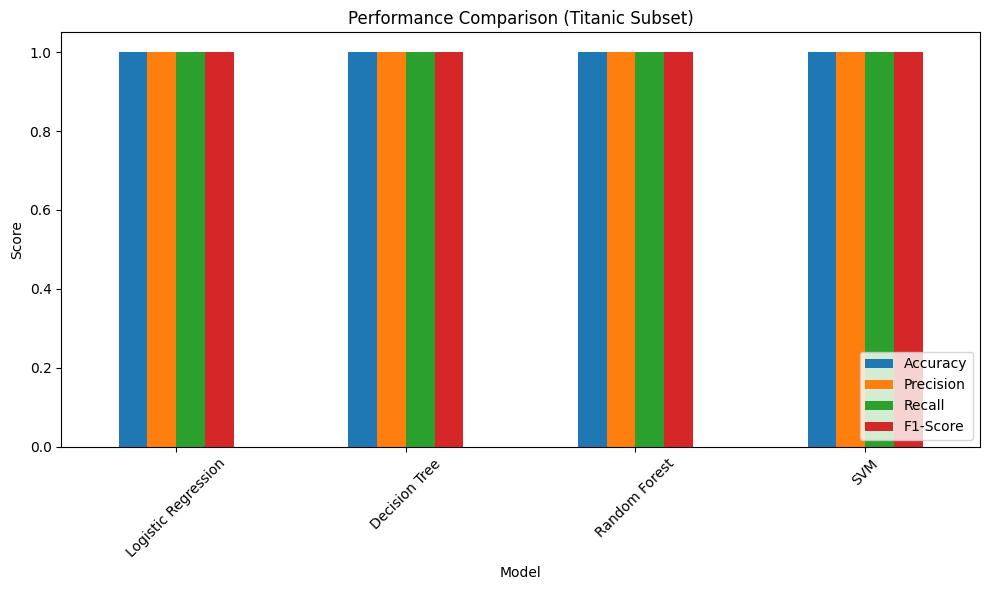

In [17]:
# 7. Plotting
comparison_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Performance Comparison (Titanic Subset)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [18]:
# 8. Identify and Save Best Model
# We'll pick the one with the highest F1-Score that also has a low Gen_Gap
best_model_name = comparison_df.iloc[comparison_df['F1-Score'].idxmax()]['Model']
best_model = models[best_model_name]

joblib.dump(best_model, 'best_titanic_model.pkl')
print(f"\n✅ Best Model: {best_model_name} saved as 'best_titanic_model.pkl'")


✅ Best Model: Logistic Regression saved as 'best_titanic_model.pkl'
